# Topic 3

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def movespines():
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))

## Exercise 1

$f(x) = \frac{sin(x)}{x}$

In [3]:
def sinxOverX(x):
    return np.sin(x)/x

Newton's Difference Method using $h$ ,  $f'(x) \approx \frac{f(x + h) - f(x)}{h}$

In [4]:
def deriv(f, x, h = 1e-2):
    return (f(x + h) - f(x) ) / h

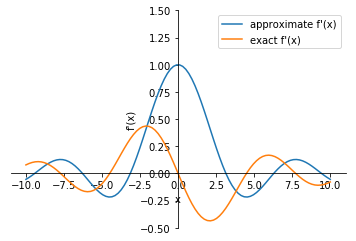

In [5]:
x = np.linspace(-10, 10, 100)
y = sinxOverX(x)
dydx = deriv(sinxOverX, x, 1e-2)
z = np.cos(x)/x - np.sin(x)/x**2
#dydx = z

plt.plot(x, y, label = 'approximate f\'(x)')
plt.plot(x, z, label='exact f\'(x)')

plt.ylim(-0.5, 1.5)
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend(loc = 'upper right')
movespines()

plt.show()

The approximate value of $f'(\frac{\pi}{2}):$

In [6]:
print(deriv(sinxOverX, np.pi/2, 1e-2))

-0.405883869937


The exact value of $f'(\frac{\pi}{2}):$

In [7]:
print(np.cos(np.pi/2)/(np.pi/2) - np.sin(np.pi/2)/(np.pi/2)**2)

-0.405284734569


$Error: slope - f'(x) = error = \frac{f"(x)\cdot h}{2} + 0\cdot h^2$

In [8]:
x = np.pi/2
h = 1e-2
secondDeriv = (-np.sin(x)*x**(-1))*(2*x**(-2) - 1) - 2*np.cos(x)*x**(-2)
error = abs(secondDeriv*h/2 + 0*h**2)

print(error)

0.000602976107182


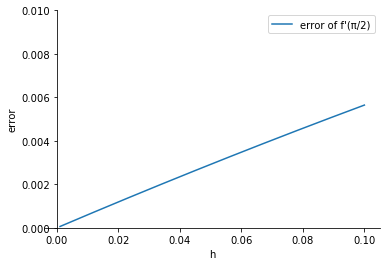

In [9]:
h = np.linspace(0.001, 0.1, 10)
x = np.pi/2

approx = deriv(sinxOverX, x, h)
exact = np.cos(x)/(x) - np.sin(x)/(x)**2
error = abs(approx - exact)
plt.plot(h, error, label = 'error of f\'(π/2)')

plt.ylim(0, 0.01)
plt.xlabel('h')
plt.ylabel('error')
plt.legend(loc = 'upper right')
movespines()

plt.show()

As it is said within the question, the error is in fact the difference between the approximation of $f'(\frac{\pi}{2})$ and its real value. Therefore, the linear graph is created by plotting the absolute value of the difference.

## Exercise 2

Again with $f(x) = \frac{sin(x)}{x}$

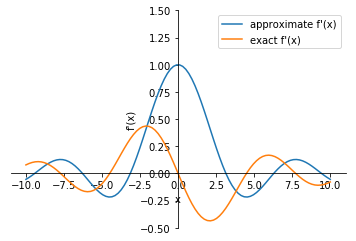

In [10]:
x = np.linspace(-10, 10, 100)

dydx = deriv(sinxOverX, x, 1e-2) #numarical derivative
z = np.cos(x)/x - np.sin(x)/x**2 #analytical derivative

plt.plot(x, y, label = 'approximate f\'(x)')
plt.plot(x, z, label='exact f\'(x)')

plt.ylim(-0.5, 1.5)
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend(loc = 'upper right')
movespines()

plt.show()

A Centered Differencing Method using $h^2$ , $f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}$

In [11]:
def derivhSqr(f, x, h = 1e-2):
    return (f(x + h) - f(x - h)) / (2 * h)

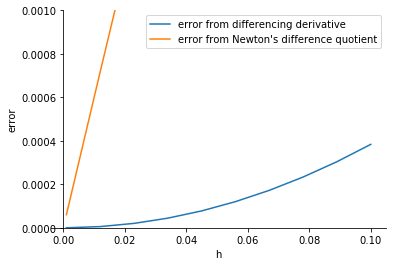

In [12]:
h = np.linspace(0.001, 0.1, 10)
x = np.pi/2

approxDD = derivhSqr(sinxOverX, x, h)
approxNewton = deriv(sinxOverX, x, h)
exact = np.cos(x)/(x) - np.sin(x)/(x)**2
errorDD = abs(approxDD - exact)
errorNewton = abs(approxNewton - exact)
plt.plot(h, errorDD, label = 'error from differencing derivative')
plt.plot(h, errorNewton, label = 'error from Newton\'s difference quotient')

plt.ylim(0, .001)
plt.xlabel('h')
plt.ylabel('error')
plt.legend(loc = 'upper right')
movespines()

plt.show()

Since we are using the centered differencing method with $h^2$ instead Newton's Difference Method with $h$, the error function has a behavior of an exponential function. 

## Exercise 3

A function to generate second derivative:

Original function: 
    $\frac{1}{4}(x^3 + 3x^2 - 6x - 8)$

In [13]:
def my_Function_X(x):
    return 1/4*((x**3) + 3*(x**2) - 6*x - 8)

Numarical first and second derivatives:

In [14]:
def deriv_First(f, x, h = 1e-4):
    return (f(x+h) - f(x))/h

In [15]:
def deriv_Second(f, x, h = 1e-4):
    return (deriv_First(f, x+h, h) - deriv_First(f, x, h)) / h

The exact second derivative:

In [16]:
def secondDeriv(x):
    return (3*x)/2 + 3/2

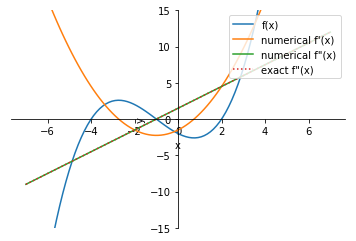

In [17]:
x = np.linspace(-7, 7, 100)

plt.plot(x, my_Function_X(x), label = 'f(x)')
plt.plot(x, deriv_First(my_Function_X, x, h = 1e-4), label = 'numerical f\'(x)')
plt.plot(x, deriv_Second(my_Function_X, x, h = 1e-4), label = 'numerical f"(x)')
plt.plot(x, secondDeriv(x), linestyle = ":", label = 'exact f"(x)')

plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'upper right')
movespines()

plt.show()

The second derivative calculated in a numarical way and the exact sec0ond derivative overlaps with each other. 

In [18]:
def firstDeriv(x):
    return (3*x**2)/4 + (3*x)/2 - 6

In [19]:
def secondDeriv(x):
    return (3*x)/2 + 3/2

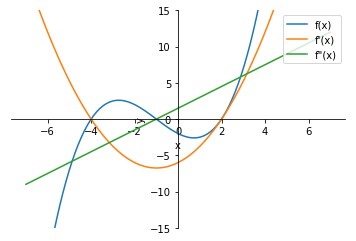

In [20]:
x = np.linspace(-7, 7, 100)

plt.plot(x, my_Function_X(x), label = 'f(x)')
plt.plot(x, firstDeriv(x), label = 'f\'(x)')
plt.plot(x,secondDeriv(x), label = 'f"(x)')

plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'upper right')
movespines()

plt.show()

## Exercise 4

Re-examining the error-scaling graphs to very small $h$

In [21]:
def deriv(f, x, h = 1e-2):
    return (f(x + h) - f(x) ) / h

In [22]:
def derivhSqr(f, x, h = 1e-2):
    return (f(x + h) - f(x - h)) / (2 * h)

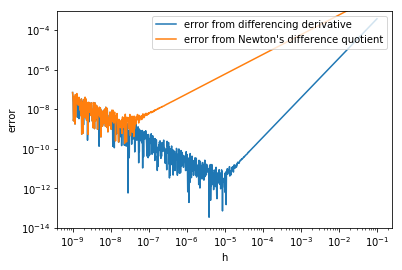

In [23]:
h = 10**(np.linspace(-9, -1, 1000))
x = np.pi/2

approxDD = derivhSqr(sinxOverX, x, h)
approxNewton = deriv(sinxOverX, x, h)
exact = np.cos(x)/(x) - np.sin(x)/(x)**2
errorDD = abs(approxDD - exact)
errorNewton = abs(approxNewton - exact)
plt.loglog(h, errorDD, label = 'error from differencing derivative')
plt.plot(h, errorNewton, label = 'error from Newton\'s difference quotient')

plt.ylim(1e-14, 0.001)
plt.xlabel('h')
plt.ylabel('error')
plt.legend(loc = 'upper right')

plt.show()

Further to the negative from $10^{-4}$, we stop getting improvements. Theoratically considering the error, the smaller h gets, the smaller the error should be as well. Yet, the error-scaling graphs do not present amy more improvements below the point $10^{-4}$. This is because if chosen too small, the subtraction will yield a large rounding error due to the failure of the compiler facilities. 

The best approximation is approximately $10^{-6}$ for differencing derivative and $10^{-4}$ for Newton's difference quotient.

The computer system is not able to compilevery precise numvbers that it yields an error as we try to reach a smaller h values. Eventually, it generates an error to the approximation of derivatives at certain points below $10^4$.

The order of approximation refers to how precise an approximation is. The higher order it gets to such as $h^3$ compared to $h^2$, the approximation of the error gets more refined. 

## Bonus: A function which calculates the nth derivative of a function, for arbitrary n

In [48]:
def nderivative(f, x, h, n):
    if n == 1:
        return (f(x + h) - f(x)) / h
    else: 
        return (nderivative(f, x+h, h, n-1) - nderivative(f, x, h, n-1)) / h

###  The 4th Derivative of sinh(x) numerically

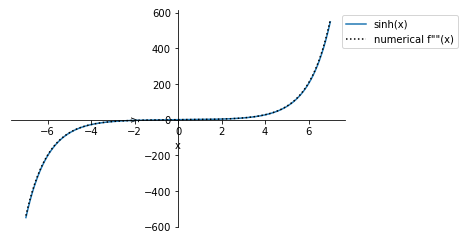

In [55]:
x = np.linspace(-7, 7, 1000)
y = np.sinh(x)
FourthDeriv = nderivative(np.sinh, x, 1e-2, 4)

plt.plot(x, y, label = 'sinh(x)')
plt.plot(x, FourthDeriv, label = 'numerical f""(x)', linestyle = ":", color = "black")

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.35, 1))
movespines()

plt.show()